### Klasifikasi Kuku Sehat dan Kuku terry
Sayyidan Muhamad Ikhsan

20/460160/TK/50749


Kondisi "terry's nails" adalah suatu kondisi yang dapat terjadi pada kuku manusia, yang ditandai dengan perubahan pada penampilan kuku yang terlihat putih pucat atau keabu-abuan dengan garis merah coklat atau coklat gelap pada ujung kuku. Kondisi ini dinamai dari Dr. Richard Terry yang pertama kali mendokumentasikannya pada tahun 1954.

Terry's nails terkait dengan beberapa penyakit serius, termasuk masalah kesehatan yang mempengaruhi hati, ginjal, jantung, atau diabetes. Hubungannya dengan penyakit-penyakit ini terutama melalui mekanisme yang terlibat dalam pembentukan dan pertumbuhan kuku.

- Hati: Kondisi hati yang parah seperti sirosis hati dapat mengubah struktur dan warna kuku. Terry's nails adalah salah satu tanda yang dapat muncul pada orang dengan sirosis hati atau gangguan hati lainnya.

- Ginjal: Kondisi seperti gagal ginjal kronis atau gagal ginjal akut dapat mempengaruhi pertumbuhan dan struktur kuku, termasuk mengubah warna kuku menjadi pucat atau keabu-abuan.

- Jantung: Beberapa kondisi jantung yang parah, seperti gagal jantung kongestif, dapat menyebabkan perubahan pada kuku, termasuk Terry's nails.

- Diabetes: Penderita diabetes yang tidak terkontrol dengan baik dapat mengalami perubahan pada kuku, termasuk Terry's nails, karena diabetes dapat mempengaruhi sirkulasi darah dan nutrisi yang mencapai kuku.

Terry's nails mungkin juga terkait dengan kondisi lain, termasuk hipotiroidisme, malnutrisi, dan beberapa jenis kanker. Namun, penting untuk diingat bahwa Terry's nails bukanlah diagnosis tunggal yang dapat menunjukkan secara pasti suatu penyakit. Sebagai gantinya, merupakan tanda yang memicu perluasan penilaian medis lebih lanjut dan pemeriksaan lebih lanjut untuk mendiagnosis penyakit yang mendasarinya. Jika Anda mengalami perubahan pada kuku atau memiliki kekhawatiran tentang kesehatan Anda, sebaiknya konsultasikan dengan dokter untuk evaluasi lebih lanjut dan penanganan yang sesuai.


# Setup

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
import tensorflow as tf
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Avoid OOM errors by setting GPU Memory Consumption Growth
#Normally, when load in tensorflow it's going to expand and use all of the potential available Vram
#this code can prevent that happens
gpus = tf.config.experimental.list_physical_devices('GPU')
#limitting the memori growth -> keep it the memory to minimum or whetever absolutely need
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
dataset ="/content/drive/MyDrive/BAI/two nail class"

In [ ]:
os.listdir(dataset)

['normal', 'terry_s nail']

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#tf.keras.utils.image_dataset_from_directory??

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(dataset)
#building data pipeline

Found 285 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
#convert or allow us to access the generator from our data pipeline
#allowing to loop

In [ ]:
batch = data_iterator.next()
#accessing data pipeline
#grabbing one batch back

In [ ]:
batch[0].shape
#images represented as numpy

(32, 256, 256, 3)

In [ ]:
batch[1]

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int32)

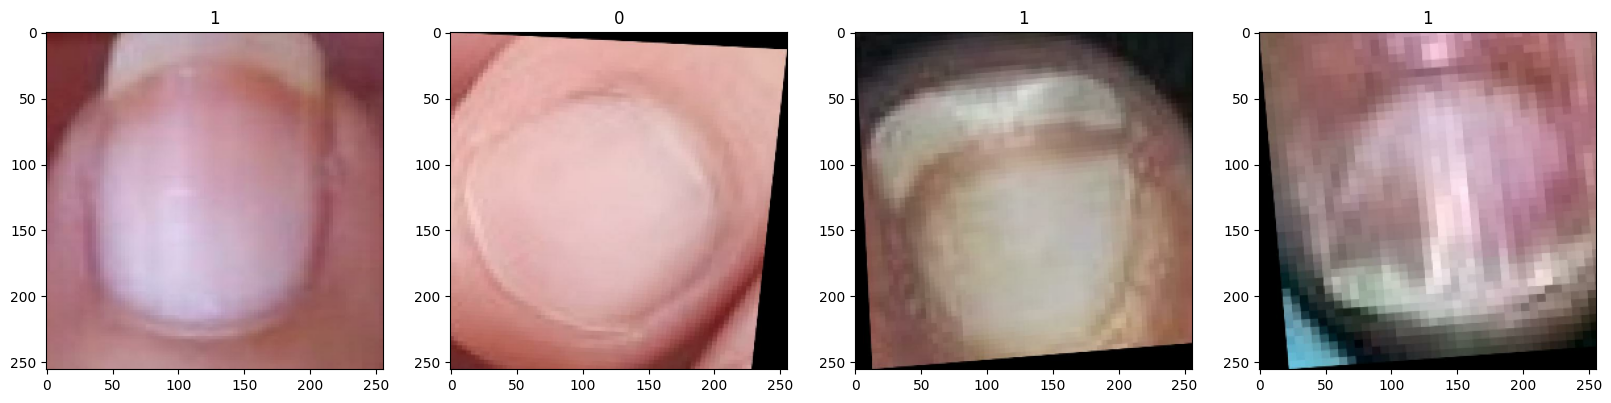

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
#0 label means healthy nail
#1 means terry's

## Pre-process

In [ ]:
#scale data
data = data.map(lambda x,y:(x/255,y)) #x image, y label

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.2504902 , 0.09754902, 0.07009804],
          [0.2629902 , 0.10808823, 0.08161765],
          [0.2647059 , 0.09803922, 0.07450981],
          ...,
          [0.85759807, 0.6458333 , 0.5987745 ],
          [0.8598039 , 0.6480392 , 0.6068627 ],
          [0.8627451 , 0.6509804 , 0.6117647 ]],
 
         [[0.23039216, 0.0872549 , 0.05784314],
          [0.25588235, 0.10294118, 0.07745098],
          [0.2615196 , 0.10122549, 0.07941177],
          ...,
          [0.84705883, 0.62671566, 0.5772059 ],
          [0.8637255 , 0.6404412 , 0.59681374],
          [0.8776961 , 0.65416664, 0.61691177]],
 
         [[0.20661765, 0.0752451 , 0.04877451],
          [0.23995098, 0.0992647 , 0.07573529],
          [0.26078433, 0.10784314, 0.0882353 ],
          ...,
          [0.84632355, 0.62083334, 0.5683824 ],
          [0.8598039 , 0.6335784 , 0.5870098 ],
          [0.87083334, 0.64436275, 0.6012255 ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

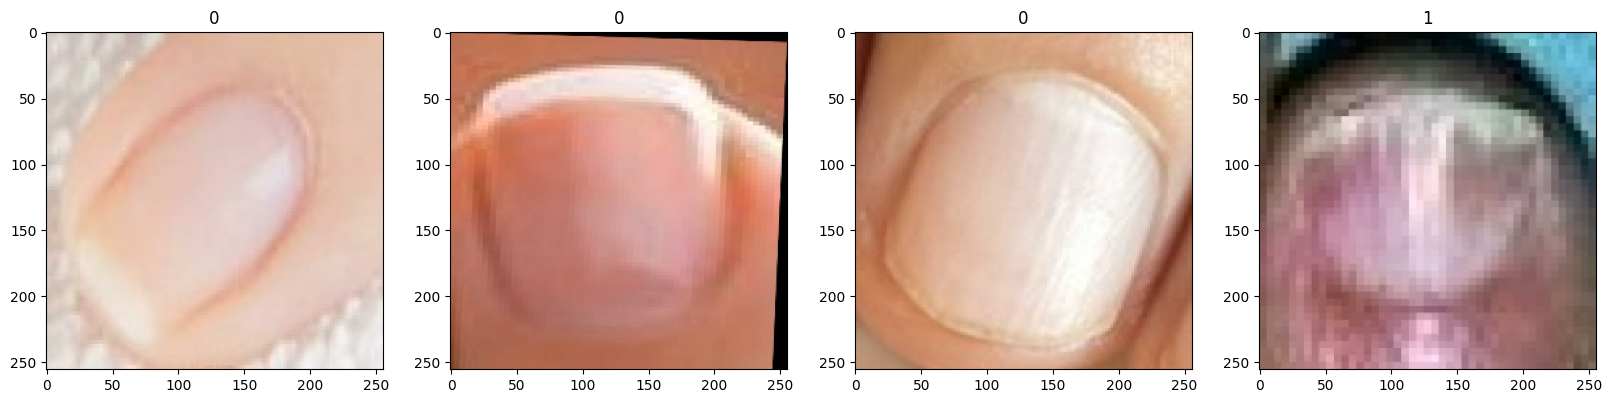

In [ ]:
batch = data.as_numpy_iterator().next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
#Split data
len(data)

9

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
train_size

6

In [ ]:
val_size

2

In [ ]:
test_size

1

In [ ]:
#take and skip
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Simple CNN

In [ ]:
#Build Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
'''
Conv2d -> konvolusi
MaxPooling2D -> act like condensing layer so it actually goes through images and condense it down so it
                goes what's the max value in this region only return
Dense -> fully connected laye
Flatten -> reduce it
Dropout -> regularization
'''

"\nConv2d -> konvolusi\nMaxPooling2D -> act like condensing layer so it actually goes through images and condense it down so it\n                goes what's the max value in this region only return\nDense -> fully connected laye\nFlatten -> reduce it\nDropout -> regularization\n"

In [ ]:
model = Sequential()

#Three convolutional blocks
#Conv2D(16,(3,3),1 -> 16 filters scans over an image and tries to condense or extract the relevant information
#size filter is 3x3
#stride 1 means it's going to move one pixel each time
#relu, any output below zero will converted to zero
model.add(Conv2D(16,(3,3),1, activation='relu', input_shape=(256,256,3))) #layer konvoluse dengan 128 filter, 3x3 kernel, dan aktivasi relu
model.add(MaxPooling2D()) #layer max pooling untuk mengurangi dimensi layar input dengan ukuran (2,2) yang berarti akan dikurangi setengahnya dalam kedua dimensi

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

#model.add(Conv2D(16,(3,3),1, activation='relu'))
#model.add(MaxPooling2D())

#Flattened layer
model.add(Flatten()) #untuk mengubah tensor multidimensi menjadi vektor satu dimensi.

#Dense layer
model.add(Dense(256, activation='relu')) #menghubungkan layer-layer
model.add(Dropout(0.5)) #teknik regularisasi dengan menghilangkan sebagian neuron secara acak untuk mencegah overfitting
model.add(Dense(1, activation='sigmoid')) #menghubungkan lapisan, sigmoid berarti outputnya ada dalam rentang 0 dan 1

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 123008)            0         
                                                                 
 dense_4 (Dense)             (None, 256)              

## Train

In [ ]:
hist = model.fit(train, epochs=25, validation_data=val)

Epoch 1/25
6/6 [==============================] - 3s 226ms/step - loss: 4.1513 - accuracy: 0.4792 - val_loss: 1.1766 - val_accuracy: 0.4688
Epoch 2/25
6/6 [==============================] - 4s 571ms/step - loss: 1.5087 - accuracy: 0.5469 - val_loss: 0.9336 - val_accuracy: 0.4531
Epoch 3/25
6/6 [==============================] - 2s 303ms/step - loss: 0.6971 - accuracy: 0.6615 - val_loss: 0.5697 - val_accuracy: 0.6719
Epoch 4/25
6/6 [==============================] - 2s 193ms/step - loss: 0.6212 - accuracy: 0.6510 - val_loss: 0.4815 - val_accuracy: 0.8438
Epoch 5/25
6/6 [==============================] - 3s 319ms/step - loss: 0.5228 - accuracy: 0.7865 - val_loss: 0.4049 - val_accuracy: 0.8438
Epoch 6/25
6/6 [==============================] - 4s 557ms/step - loss: 0.4189 - accuracy: 0.8021 - val_loss: 0.3458 - val_accuracy: 0.8438
Epoch 7/25
6/6 [==============================] - 3s 343ms/step - loss: 0.3872 - accuracy: 0.8073 - val_loss: 0.2519 - val_accuracy: 0.9062
Epoch 8/25
6/6 [====

In [ ]:
model.save('/content/drive/MyDrive/BAI/model/simpleCNN.keras')

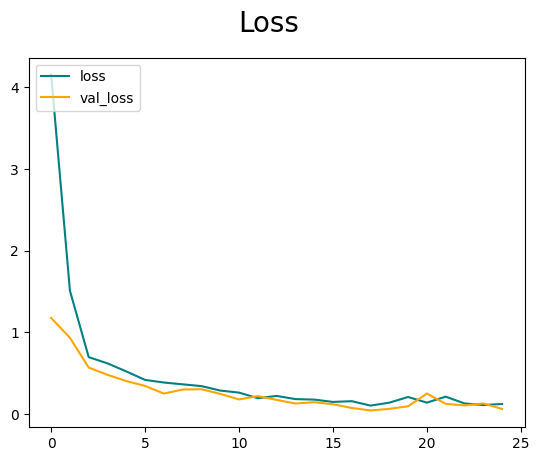

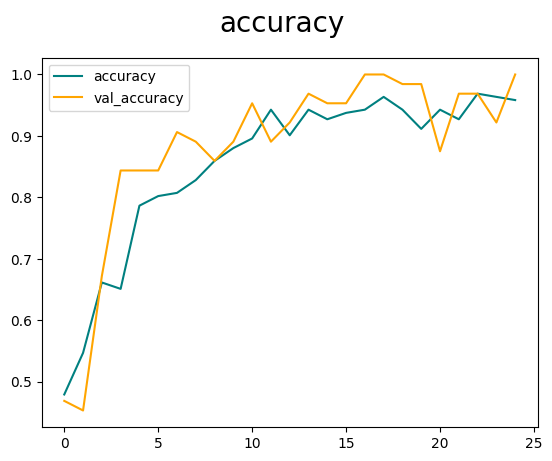

In [ ]:
#plot performance
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange',label ='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

#plot performance
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange',label ='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 118ms/step


In [ ]:
print (f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9411764740943909, Recall:1.0, Accuracy:0.9655172228813171


## Test

In [ ]:
import cv2

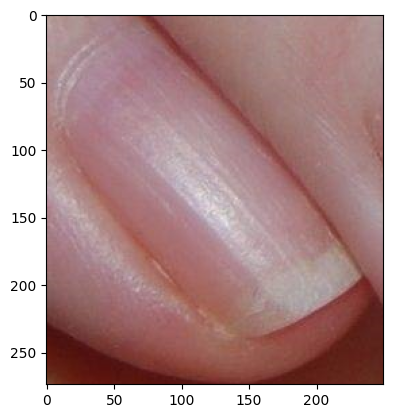

In [ ]:
#normal
img=cv2.imread('/content/drive/MyDrive/BAI/tes/normal (17).jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize=tf.image.resize(img,(256,256))
yhat = model.predict(np.expand_dims(resize/255,0))
yhat=float(yhat)
yhat

print(yhat)
if yhat < 0.5:
  print('normal nail')
else:
  print('terry''s nail')

1/1 [==============================] - 0s 23ms/step
0.9999555349349976
terrys nail


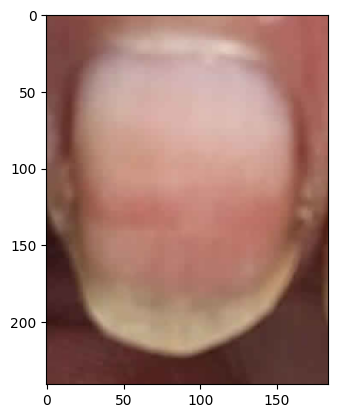

1/1 [==============================] - 0s 20ms/step
0.9999808073043823
terrys nail


In [ ]:

img=cv2.imread('/content/drive/MyDrive/BAI/terry.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(256,256))
yhat = model.predict(np.expand_dims(resize/255,0))
res=float(yhat)
print(res)
if res < 0.5:
  print('normal nail')
else:
  print('terry''s nail')

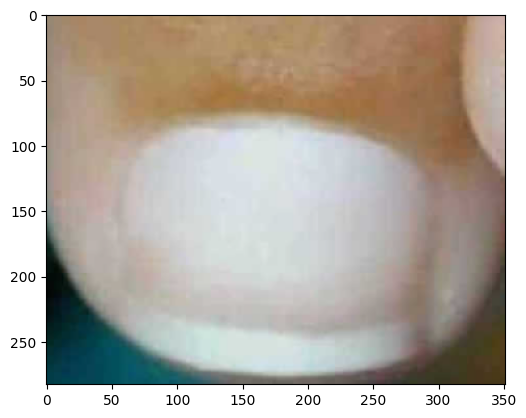

1/1 [==============================] - 0s 20ms/step
0.040655266493558884
normal nail


In [ ]:
#abnormal
img=cv2.imread('/content/drive/MyDrive/BAI/terry2.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(256,256))
yhat = model.predict(np.expand_dims(resize/255,0))
res=float(yhat)
print(res)
if res < 0.5:
  print('normal nail')
else:
  print('terry''s nail')

# Mobilenet

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
# Define a function to reshape each image
def reshape_image(image, _):
    return tf.image.resize(image, (224, 224))

# Map the reshape function to the dataset
reshaped_train = train.map(lambda x, _: (reshape_image(x, _), _))
reshaped_val = val.map(lambda x, _: (reshape_image(x, _), _))

# Now, `reshaped_dataset` contains images of shape (224, 224, 3)


In [ ]:
mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),
                                           include_top=False,
                                           weights='imagenet')
mobilenet.trainable = False

model = Sequential()
model.add(mobilenet)

model.add(Conv2D(128, (3, 3), activation='relu')) #layer konvoluse dengan 128 filter, 3x3 kernel, dan aktivasi relu
model.add(MaxPooling2D(pool_size=(2, 2))) #layer max pooling untuk mengurangi dimensi layar input dengan ukuran (2,2) yang berarti akan dikurangi setengahnya dalam kedua dimensi
model.add(GlobalAveragePooling2D()) #digunakan untuk mengurangi jumlah parameter yang diperlukan dengan mengambil nilai rata-rata dan mencegah overfitting

#model.add(Flatten())
#model.add(Dense(1024, activation="relu"))
#model.add(Dense(512, activation="relu"))

model.add(Dropout(0.5)) #teknik regularisasi dengan menghilangkan sebagian neuron secara acak untuk mencegah overfitting
model.add(Dense(1, activation="sigmoid" , name="classification")) #menghubungkan lapisan, sigmoid berarti outputnya ada dalam rentang 0 dan 1

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 128)         1179776   
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 2, 2, 128)         0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_2  (None, 128)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
hist = model.fit(reshaped_train, epochs=10, validation_data = reshaped_val)

Epoch 1/10
6/6 [==============================] - 5s 360ms/step - loss: 6.1621 - accuracy: 0.5365 - val_loss: 0.7288 - val_accuracy: 0.5156
Epoch 2/10
6/6 [==============================] - 4s 566ms/step - loss: 0.6275 - accuracy: 0.5104 - val_loss: 0.4544 - val_accuracy: 0.5938
Epoch 3/10
6/6 [==============================] - ETA: 0s - loss: 0.5216 - accuracy: 0.5365

In [ ]:
model.save('/content/drive/MyDrive/BAI/model/mobileNet.keras')

In [ ]:
#plot performance
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange',label ='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange',label ='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  resize=tf.image.resize(X,(224,224))
  yhat = model.predict(resize)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

print (f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

In [ ]:
#abnormal
img=cv2.imread('/content/drive/MyDrive/BAI/terry.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(224,224))
yhat = model.predict(np.expand_dims(resize/255,0))
res=float(yhat)
print(res)
if res < 0.5:
  print('normal nail')
else:
  print('terry''s nail')

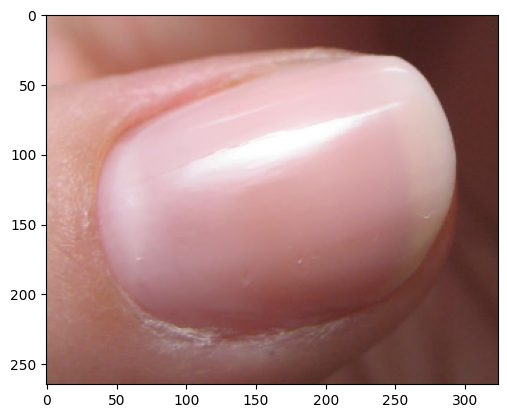

1/1 [==============================] - 0s 21ms/step
0.15257373452186584
normal nail


In [ ]:
#normal
img=cv2.imread('/content/drive/MyDrive/BAI/tes/healthy nail.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(224,224))
yhat = model.predict(np.expand_dims(resize/255,0))
res=float(yhat)
print(res)
if res < 0.5:
  print('normal nail')
else:
  print('terry''s nail')

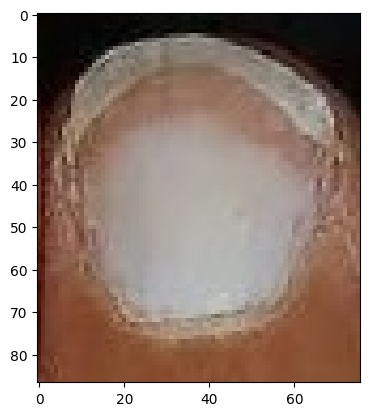

1/1 [==============================] - 0s 21ms/step
0.9993126392364502
terrys nail


In [ ]:
#terry
img=cv2.imread('/content/drive/MyDrive/BAI/tes/terry (14).jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(224,224))
yhat = model.predict(np.expand_dims(resize/255,0))
res=float(yhat)
print(res)
if res < 0.5:
  print('normal nail')
else:
  print('terry''s nail')

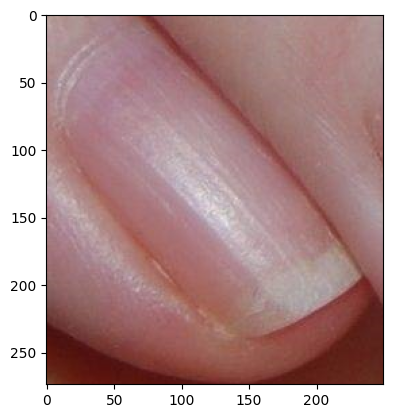

1/1 [==============================] - 0s 23ms/step
0.03658245876431465
normal nail


In [ ]:
#health
img=cv2.imread('/content/drive/MyDrive/BAI/tes/normal (17).jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(224,224))
yhat = model.predict(np.expand_dims(resize/255,0))
res=float(yhat)
print(res)
if res < 0.5:
  print('normal nail')
else:
  print('terry''s nail')